In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")

In [4]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [8]:
df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [11]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [14]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour

In [16]:
df.drop(['datetime', 'casual', 'registered'], axis=1, inplace=True)

In [20]:
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    
    squared_error = (log_y - log_pred)**2
    
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

In [21]:
def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

In [23]:
def evaluate_regr(y, pred):
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
    mse_val = mean_absolute_error(y, pred)
    print(f"RMSLE : {rmsle_val}, RMSE : {rmse_val}, MSE : {mse_val}")

### 로그 변환, 피처 인코딩, 모델 학습/예측 평가

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [25]:
y_target = df['count']

In [26]:
features = df.drop(['count'], axis=1, inplace=False)

In [28]:
features.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,1


In [31]:
y_target[:2]

0    16
1    40
Name: count, dtype: int64

In [33]:
x_train, x_test, y_train, y_test = train_test_split(features, y_target, test_size=0.3, random_state=0)

In [34]:
lr_reg = LinearRegression()
lr_reg.fit(x_train, y_train)

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
pred = lr_reg.predict(x_test)

In [36]:
evaluate_regr(y_test, pred)

RMSLE : 1.1646636237113657, RMSE : 140.8995886716545, MSE : 105.92444835099782


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log1p
  This is separate from the ipykernel package so we can avoid doing imports until


- 어느정도 차이나는지 DF로 봐서 오류가 큰 순으로 확인

In [38]:
def get_top_err(y_test, pred, n_tops=5):
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count'] = np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    
    print(result_df.sort_values('diff', ascending=False)[:n_tops])

In [39]:
get_top_err(y_test, pred, n_tops=5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


- Target의 분포가 어떻게 되어있는지 확인합시다

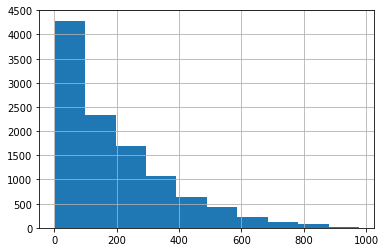

In [41]:
y_target.hist();

- 0 ~ 200 사이에 있음
- 로그를 사용해 변환함

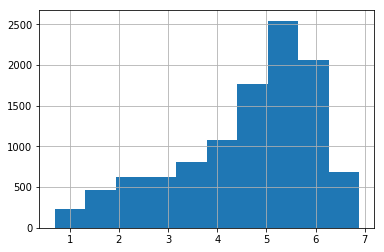

In [43]:
y_log_transform = np.log1p(y_target)
y_log_transform.hist();

- 이젠 우측으로 됨

### 재학습

In [44]:
y_target_log = np.log1p(y_target)

x_train, x_test, y_train, y_test = train_test_split(features, y_target_log, test_size=0.3, random_state=0)

In [45]:
lr_reg = LinearRegression()
lr_reg.fit(x_train, y_train)
pred = lr_reg.predict(x_test)

In [46]:
y_test_exp = np.expm1(y_test)

In [47]:
pred_exp = np.expm1(pred)

In [48]:
evaluate_regr(y_test_exp, pred_exp)

RMSLE : 1.0168265982003482, RMSE : 162.5942680900477, MSE : 109.28615860077618


- RMSLE 오류는 줄어들었지만 RMSE는 오히려 늘어남

- Feature의 회귀 계수 시각화

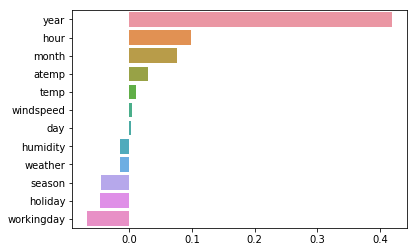

In [50]:
coef = pd.Series(lr_reg.coef_, index=features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index);

- Year가 독보적임
- 궁금한 점 : 이렇게 해도 되나? 시간 축으로 잘라야지
- Year를 카테고리로 넣어야 함

In [53]:
features_ohe = pd.get_dummies(features, columns=['year', 'month', 'hour', 'holiday', 'workingday', 'season', 'weather'])

In [55]:
x_train, x_test, y_train, y_test = train_test_split(features_ohe, y_target_log, test_size=0.3, random_state=0)

In [57]:
def get_model_predict(model, x_trian, x_test, y_train, y_test, is_expm1=False):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    
    if is_expm1:
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print("###", model.__class__.__name__, "###")
    evaluate_regr(y_test, pred)

In [58]:
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

In [59]:
for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model, x_train, x_test, y_train, y_test, is_expm1=True)

### LinearRegression ###
RMSLE : 0.5888892661882307, RMSE : 97.48327432713705, MSE : 63.1057903681318
### Ridge ###
RMSLE : 0.5894752171687985, RMSE : 98.4068518121136, MSE : 63.64829841991179
### Lasso ###
RMSLE : 0.6343885661945604, RMSE : 113.03085220528483, MSE : 72.65823233429542


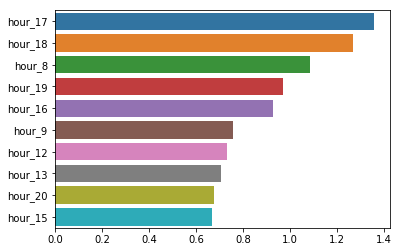

In [61]:
coef = pd.Series(lr_reg.coef_, index=features_ohe.columns)

coef_sort = coef.sort_values(ascending=False)[:10]
sns.barplot(x=coef_sort.values, y=coef_sort.index);

In [62]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [63]:
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

In [64]:
for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    get_model_predict(model, x_train, x_test, y_train, y_test, is_expm1=True)

### RandomForestRegressor ###
RMSLE : 0.3537710444289722, RMSE : 50.726271499617624, MSE : 31.496662681774705
### GradientBoostingRegressor ###
RMSLE : 0.34044989925409075, RMSE : 55.82067610388299, MSE : 34.35281661594244
### XGBRegressor ###
RMSLE : 0.3455648380699254, RMSE : 56.474160109707334, MSE : 34.91721440839826
### LGBMRegressor ###
RMSLE : 0.3157673229959641, RMSE : 46.47328497926287, MSE : 28.777295285144294


- 더 어떻게 해야 오를까?